# Tarea 02. Errores en la computación.

**Estudiante:**Dayana Andrea Henao Arbeláez. 

**Cédula:** 1001469185.


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [325]:
import math as mt
import numpy as np
import matplotlib.pylab as plt 

\begin{equation}
e^{-x}
\end{equation}

In [326]:
#Programa que calcula en n-ésimo termino de la serie de Taylor para e^-x

def e_(x, n):
  return ((-1) ** (n) * x ** (n))/ (mt.factorial(n))
            
def e_sum(x, N):  
  suma = 0                          
  for i in range(1, N):              
    suma = e_(x, i) + suma  
  return suma

In [327]:
#Calculo de la funcion e^-x en comparacion con la función computada con la serie de Taylor
x = np.linspace(-3, 5, 50)
fexacta = np.exp(-x)     #Función exacta
ftaylor= e_sum(x = x , N = 8)  #Cálculo de la función empleando series de Taylor  

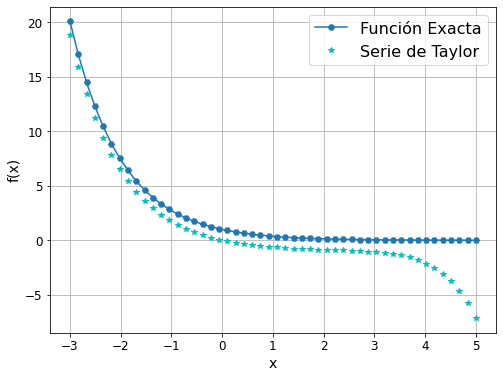

In [328]:
# Gráfica de ambas funciones 
plt.figure(figsize = (8, 6))       
plt.plot(x,fexacta, "H-",  label= "Función Exacta") 
plt.plot(x,ftaylor, "c*" , label= "Serie de Taylor")

plt.xlabel("x", fontsize = 14)     
plt.ylabel("f(x)", fontsize = 14) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 16, loc = 1) 
plt.grid()
plt.show()

In [329]:
#Estudio de convergencia de la serie
x = 1
t = np.exp(-x)
Nesimo = np.arange(0, 10, 1)

In [330]:
y = []
error = []
for i in Nesimo:
  val = e_sum(x = x, N = i )
  y.append(val)
  e = np.fabs(val - t)/t
  error.append(e)

<Figure size 432x360 with 0 Axes>

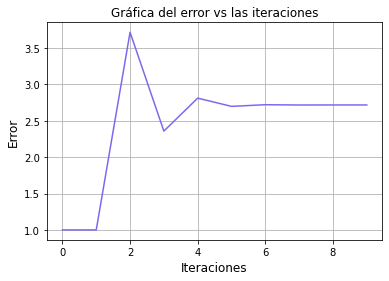

<Figure size 432x360 with 0 Axes>

In [331]:
plt.grid()
plt.plot(error, color='mediumslateblue')
plt.xlabel("Iteraciones", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.title('Gráfica del error vs las iteraciones')
plt.figure(figsize=(6,5))


\begin{equation}
e^{-x} = \frac{1}{e^{x}}
\end{equation}

In [332]:
# Calculo de la funcion e^-x = 1/e^x en comparacion con la función computada con la serie de Taylor 
x = np.linspace(-3, 5, 50)
fexacta1 = 1/np.exp(x)
ftaylor= e_sum(x = x , N = 8)

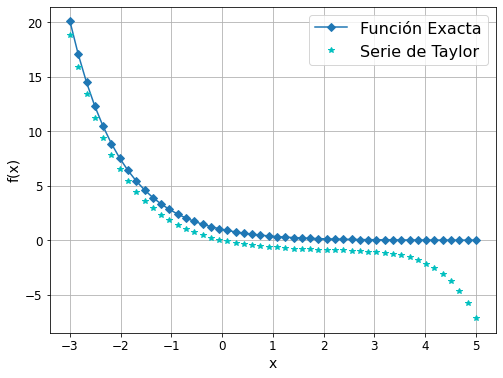

In [333]:
plt.figure(figsize = (8, 6))       
plt.plot(x,fexacta1, "D-",  label= "Función Exacta") 
plt.plot(x,ftaylor, "c*" , label= "Serie de Taylor")

plt.xlabel("x", fontsize = 14)     
plt.ylabel("f(x)", fontsize = 14) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 16, loc = 1) 
plt.grid()
plt.show()

In [334]:
#Estudio de convergencia de la serie
x = 2
t1 = 1/np.exp(x)
Nesimo = np.arange(0, 10, 1)

In [335]:
y = []
error1 = []
for i in Nesimo:
  val = e_sum(x = x, N = i )
  y.append(val)
  e = np.fabs(val - t1)/t1
  error1.append(e)

<Figure size 432x360 with 0 Axes>

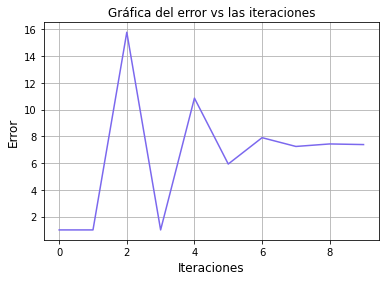

<Figure size 432x360 with 0 Axes>

In [336]:
plt.grid()
plt.plot(error1, color='mediumslateblue')
plt.xlabel("Iteraciones", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.title('Gráfica del error vs las iteraciones')
plt.figure(figsize=(6,5))

*Gráficos del error versus el número de iteraciones para diferentes valores de x*

In [337]:
N=np.arange(0,20,1)

In [354]:
def funcionerror(x,N):
  y = []
  error = []
  for i in Nesimo:
    val = e_sum(x = x, N = i )
    y.append(val)
    e = np.fabs(val - np.exp(-x))/np.exp(-x)
    error.append(e)
    
  plt.grid()
  plt.plot(error, 'gP-')
  plt.xlabel("iteraciones", fontsize=12)
  plt.ylabel("Error", fontsize=12)
  plt.title('Gráfica del error vs las iteraciones')
  plt.figure(figsize=(5,5))

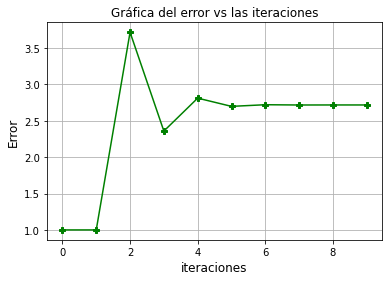

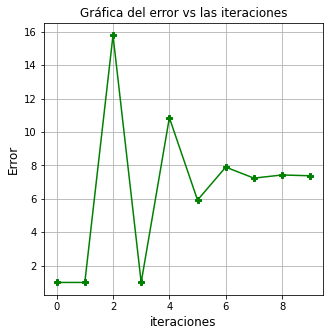

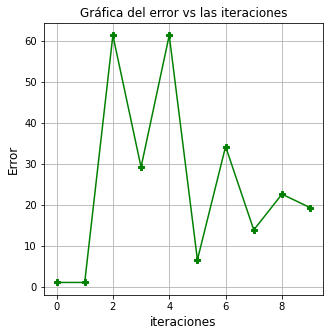

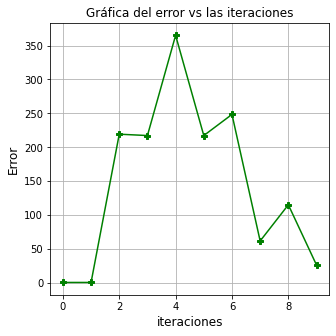

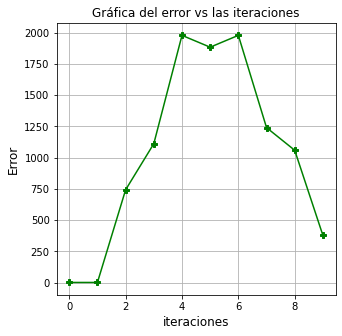

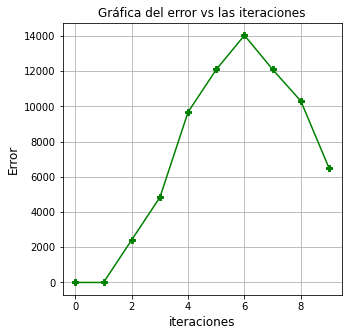

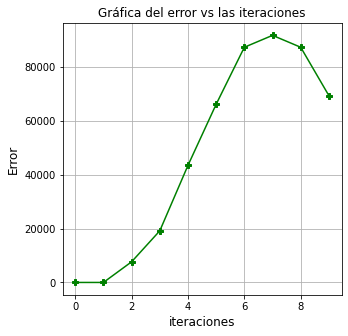

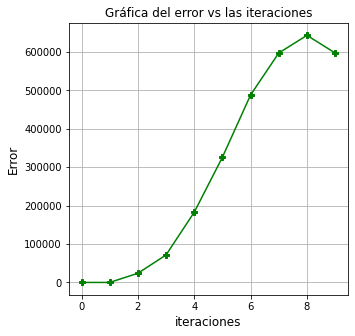

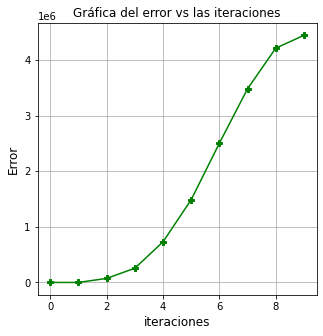

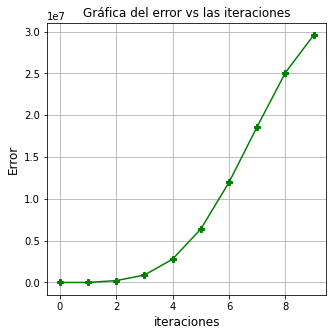

<Figure size 360x360 with 0 Axes>

In [355]:
for i in range(1,11):
  funcionerror(i,N)

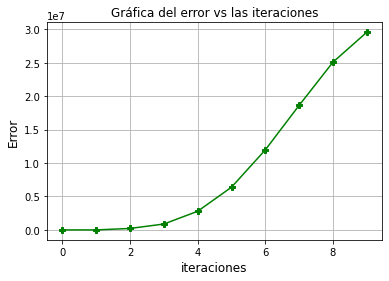

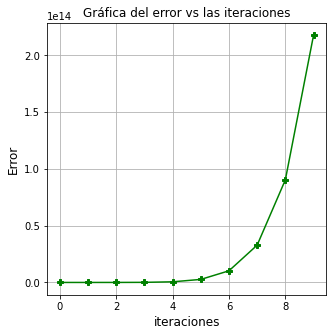

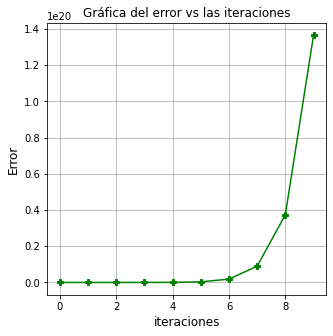

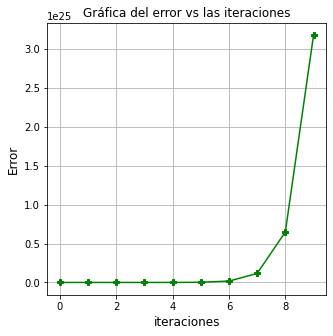

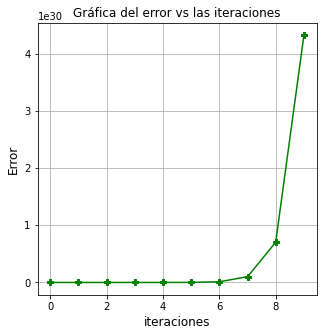

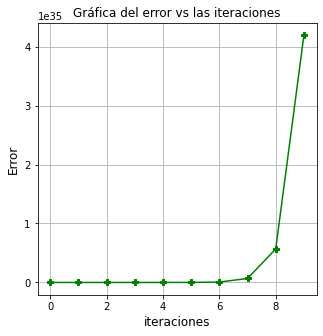

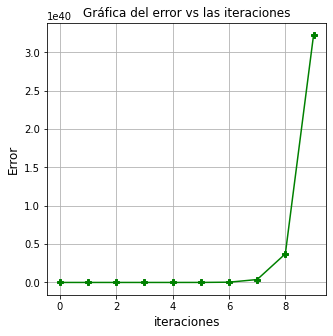

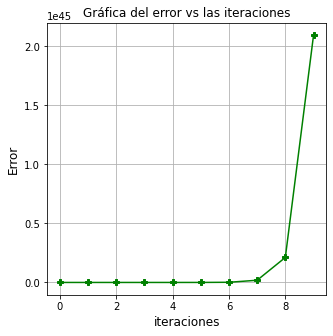

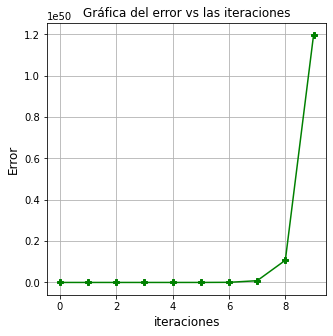

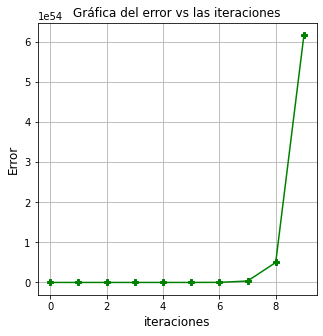

<Figure size 360x360 with 0 Axes>

In [356]:
for i in range(10,101,10):
  funcionerror(i,N)

## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

In [341]:
import numpy as np
import matplotlib.pyplot as plt

In [342]:
def f(r,xo,N):

  X_= np.zeros(N)
  t = np.arange(0, N, 1)
  for i in range(0, N):
    x = r*xo*(1-xo)
    xo = x
    X_[i] = xo
  
  dicc = {"x":X_, "t":t}
  return dicc


In [343]:
def g(r,xo,N):

  X_= np.zeros(N)
  t = np.arange(0, N, 1)
  for i in range(0, N):
    x = (r*xo)-r*(xo**2)
    xo = x
    X_[i] = xo
  
  dicc = {"x":X_, "t":t}
  return dicc

In [344]:
def p(r,xo,N):

  X_= np.zeros(N)
  t = np.arange(0, N, 1)
  for i in range(0, N):
    x=r*(xo**2)*((1/xo)-1)
    xo = x
    X_[i] = xo
  
  dicc = {"x":X_, "t":t}
  return dicc

\begin{equation}
f(x_n)=rx_n(1-x_n)
\end{equation}

\begin{equation}
g(x_n)=rx_n-rx_n ^2
\end{equation}

\begin{equation}
p(x_n)=rx_n ^2( \frac{1}{x_n}-1)
\end{equation}

Text(0.5, 1.0, 'Gráfica para 100 iteraciones')

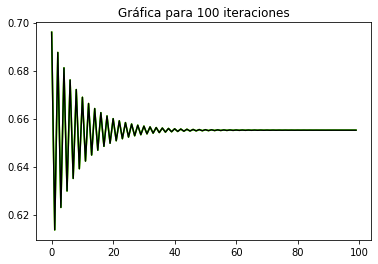

In [345]:
r = 2.9
xo = 0.4
N = 100
d1 = f(r,xo,N)
d2 = g(r,xo,N)
d3 = p(r,xo,N) 

plt.plot(d1["t"],d1["x"], color='yellow')
plt.plot(d2["t"],d2["x"], color='lime' )
plt.plot(d3["t"],d3["x"], color='black')
plt.title(f'Gráfica para {N} iteraciones')

Text(0.5, 1.0, 'Gráfica para 150 iteraciones')

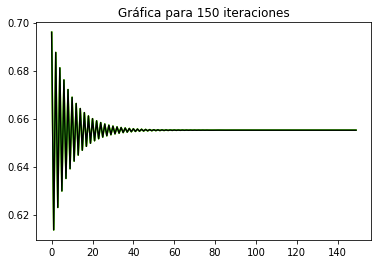

In [346]:
r = 2.9
xo = 0.4
N = 150
d1 = f(r,xo,N)
d2 = g(r,xo,N)
d3 = p(r,xo,N) 

plt.plot(d1["t"],d1["x"], color='yellow' )
plt.plot(d2["t"],d2["x"], color='lime' )
plt.plot(d3["t"],d3["x"], color='black')
plt.title(f'Gráfica para {N} iteraciones')

Text(0.5, 1.0, 'Gráfica para 200 iteraciones')

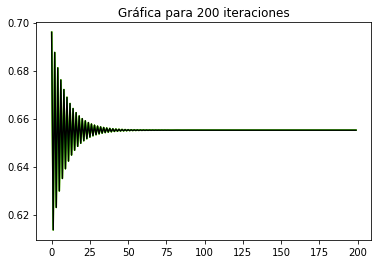

In [347]:
r = 2.9
xo = 0.4
N = 200
d1 = f(r,xo,N)
d2 = g(r,xo,N)
d3 = p(r,xo,N) 

plt.plot(d1["t"],d1["x"], color='yellow' )
plt.plot(d2["t"],d2["x"], color='lime' )
plt.plot(d3["t"],d3["x"], color='black')
plt.title(f'Gráfica para {N} iteraciones')

Text(0.5, 1.0, 'Gráfica para 100 iteraciones')

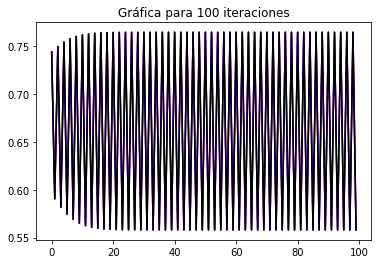

In [348]:
r = 3.1
xo = 0.6
N = 100
d1 = f(r,xo,N)
d2 = g(r,xo,N)
d3 = p(r,xo,N) 

plt.plot(d1["t"],d1["x"], color='red' )
plt.plot(d2["t"],d2["x"], color='blue' )
plt.plot(d3["t"],d3["x"], color='black')
plt.title(f'Gráfica para {N} iteraciones')

Text(0.5, 1.0, 'Gráfica para 150 iteraciones')

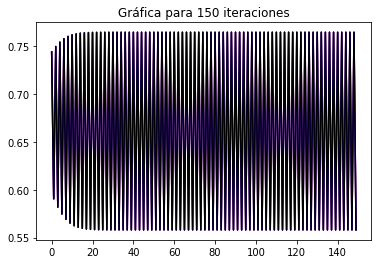

In [349]:
r = 3.1
xo = 0.6
N = 150
d1 = f(r,xo,N)
d2 = g(r,xo,N)
d3 = p(r,xo,N) 

plt.plot(d1["t"],d1["x"], color='red' )
plt.plot(d2["t"],d2["x"], color='blue' )
plt.plot(d3["t"],d3["x"], color='black')
plt.title(f'Gráfica para {N} iteraciones')

Text(0.5, 1.0, 'Gráfica para 200 iteraciones')

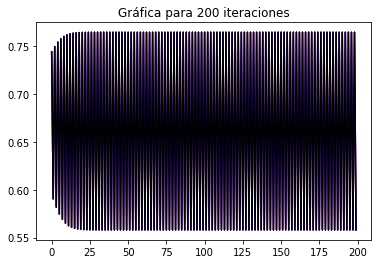

In [350]:
r = 3.1
xo = 0.6
N = 200
d1 = f(r,xo,N)
d2 = g(r,xo,N)
d3 = p(r,xo,N) 

plt.plot(d1["t"],d1["x"], color='red' )
plt.plot(d2["t"],d2["x"], color='blue' )
plt.plot(d3["t"],d3["x"], color='black')
plt.title(f'Gráfica para {N} iteraciones')

Text(0.5, 1.0, 'Gráfica para 100 iteraciones')

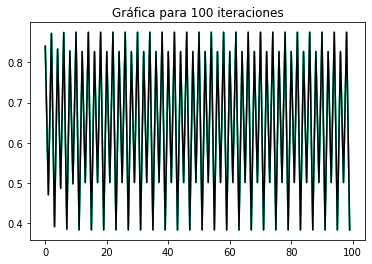

In [351]:
r = 3.5
xo = 0.4
N = 100
d1 = f(r,xo,N)
d2 = g(r,xo,N)
d3 = p(r,xo,N) 

plt.plot(d1["t"],d1["x"], color='green'  )
plt.plot(d2["t"],d2["x"], color='cyan' )
plt.plot(d3["t"],d3["x"], color='black')
plt.title(f'Gráfica para {N} iteraciones')

Text(0.5, 1.0, 'Gráfica para 150 iteraciones')

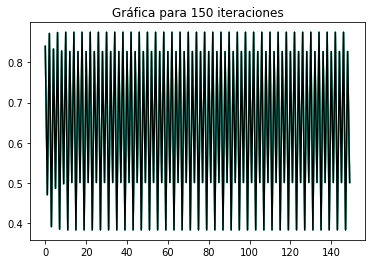

In [352]:
r = 3.5
xo = 0.4
N = 150
d1 = f(r,xo,N)
d2 = g(r,xo,N)
d3 = p(r,xo,N) 

plt.plot(d1["t"],d1["x"], color='green')
plt.plot(d2["t"],d2["x"], color='cyan' )
plt.plot(d3["t"],d3["x"], color='black')
plt.title(f'Gráfica para {N} iteraciones')

Text(0.5, 1.0, 'Gráfica para 200 iteraciones')

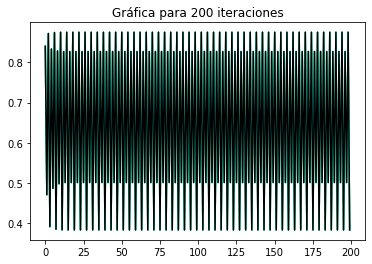

In [353]:
r = 3.5
xo = 0.4
N = 200
d1 = f(r,xo,N)
d2 = g(r,xo,N)
d3 = p(r,xo,N) 

plt.plot(d1["t"],d1["x"], color='green'  )
plt.plot(d2["t"],d2["x"], color='cyan' )
plt.plot(d3["t"],d3["x"], color='black')
plt.title(f'Gráfica para {N} iteraciones')